In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

training_file = '/kaggle/input/traffic-signs-preprocessed/train.pickle'
validation_file = '/kaggle/input/traffic-signs-preprocessed/valid.pickle'
testing_file = '/kaggle/input/traffic-signs-preprocessed/test.pickle'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train)) 

print("Eğitim seti görüntü sayısı =", n_train)
print("Doğrulama seti görüntü sayısı =", n_validation)
print("Test seti görüntü sayısı =", n_test)
print("Görüntü boyutu =", image_shape)
print("Sınıf sayısı =", n_classes)

/kaggle/input/traffic-signs-preprocessed/mean_image_rgb.pickle
/kaggle/input/traffic-signs-preprocessed/data5.pickle
/kaggle/input/traffic-signs-preprocessed/data4.pickle
/kaggle/input/traffic-signs-preprocessed/data7.pickle
/kaggle/input/traffic-signs-preprocessed/data8.pickle
/kaggle/input/traffic-signs-preprocessed/data1.pickle
/kaggle/input/traffic-signs-preprocessed/data3.pickle
/kaggle/input/traffic-signs-preprocessed/test.pickle
/kaggle/input/traffic-signs-preprocessed/mean_image_gray.pickle
/kaggle/input/traffic-signs-preprocessed/data6.pickle
/kaggle/input/traffic-signs-preprocessed/data0.pickle
/kaggle/input/traffic-signs-preprocessed/valid.pickle
/kaggle/input/traffic-signs-preprocessed/data2.pickle
/kaggle/input/traffic-signs-preprocessed/labels.pickle
/kaggle/input/traffic-signs-preprocessed/datasets_preparing.py
/kaggle/input/traffic-signs-preprocessed/std_gray.pickle
/kaggle/input/traffic-signs-preprocessed/std_rgb.pickle
/kaggle/input/traffic-signs-preprocessed/label_na

Projenin bu ilk aşamasında, modeli eğitmek için kullanacağımız Trafik İşaretleri veri seti hazırlanmaktadır. Öncelikle, veri işleme ve görselleştirme için gerekli kütüphaneler yüklendi. Ardından, pickle formatında kaydedilmiş olan eğitim, doğrulama ve test verileri okunarak programın kullanabileceği hale getirildi. Son olarak, veri setinin temel özellikleri—görüntü sayısı, boyutları ve toplam sınıf adedi—hesaplanarak projenin genel yapısı hakkında bir özet çıkarıldı.

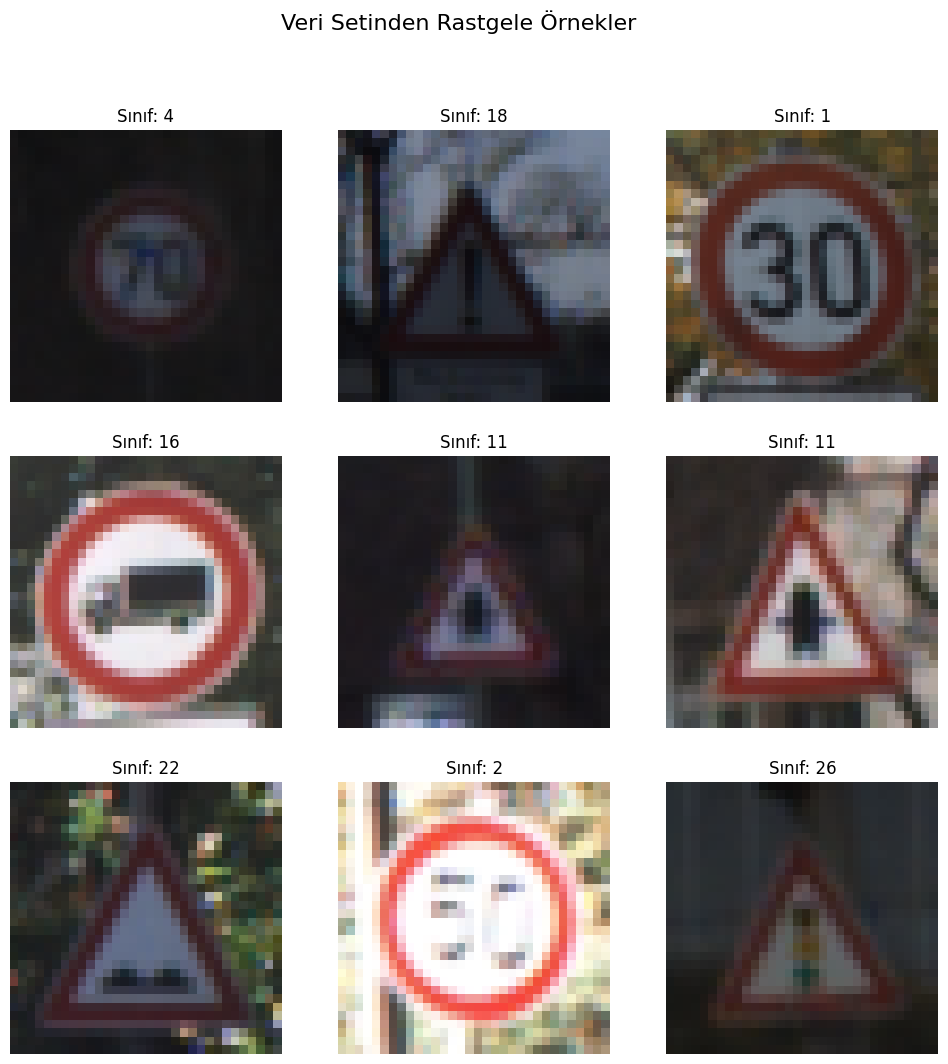

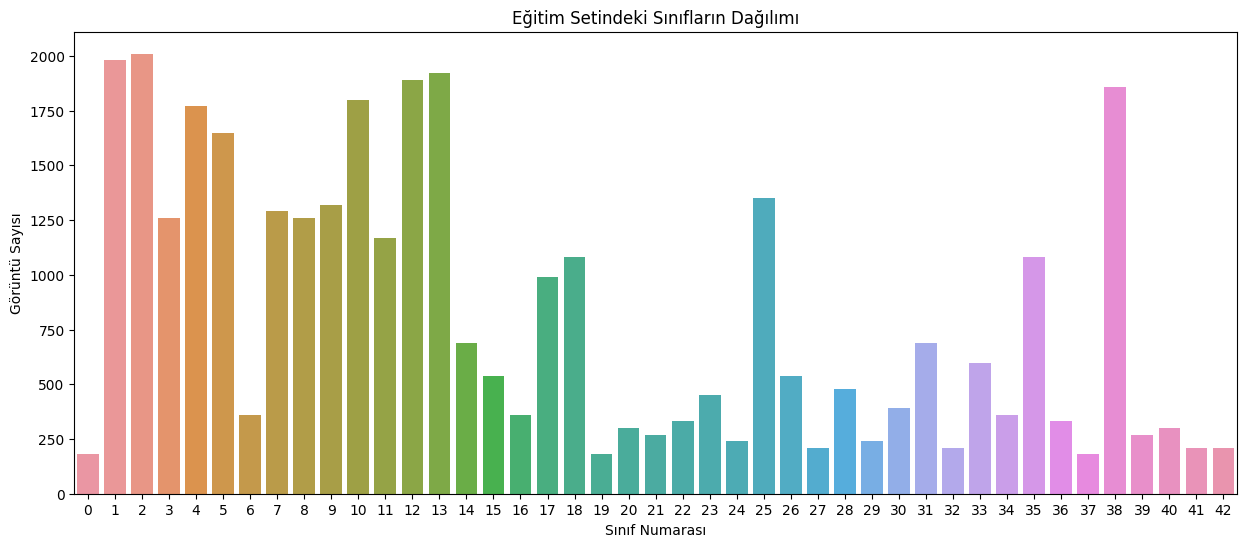

Normalizasyon tamamlandı.
Eğitim setinin yeni min değeri: 0.0
Eğitim setinin yeni max değeri: 1.0


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

plt.figure(figsize=(12, 12))
plt.suptitle("Veri Setinden Rastgele Örnekler", fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(f"Sınıf: {y_train[index]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(x=y_train)
plt.title('Eğitim Setindeki Sınıfların Dağılımı')
plt.xlabel('Sınıf Numarası')
plt.ylabel('Görüntü Sayısı')
plt.show()


X_train_normalized = X_train / 255.0
X_valid_normalized = X_valid / 255.0
X_test_normalized = X_test / 255.0

print("Normalizasyon tamamlandı.")
print("Eğitim setinin yeni min değeri:", np.min(X_train_normalized))
print("Eğitim setinin yeni max değeri:", np.max(X_train_normalized))

Veri setini yükledikten sonraki bu aşamada, içeriğini daha iyi anlamak için görselleştirmeler yapıldı ve ardından modelin eğitimi için veriler hazırlandı.

İlk olarak, eğitim setinden rastgele dokuz adet trafik işareti örneği seçilerek matplotlib ile görselleştirildi. Bu, veri setindeki görüntülerin kalitesi ve çeşitliliği hakkında genel bir fikir vermektedir. Ardından, seaborn kütüphanesi kullanılarak veri setindeki her bir sınıfın ne kadar örnek içerdiğini gösteren bir çubuk grafiği çizildi. Bu grafik, sınıflar arasındaki dağılımı ve olası dengesizlikleri ortaya koymaktadır.

Son olarak, modelin daha verimli ve kararlı bir şekilde öğrenebilmesi için normalizasyon işlemi gerçekleştirildi. Tüm görüntülerdeki piksel değerleri 255'e bölünerek, 0-255 aralığından 0-1 aralığına ölçeklendirildi.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5)) 

model.add(Dense(units=n_classes, activation='softmax'))


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)

model.summary()

print("\nModel Eğitimi Başlatılıyor...")

history = model.fit(
    X_train_normalized,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_valid_normalized, y_valid)
)

print("\nModel Eğitimi Tamamlandı!")

2025-09-26 13:38:59.249664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758893939.475444      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758893939.543408      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-26 13:39:16.076651: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,611 (4.66 MB)

 Trainable params: 1,221,611 (4.66 MB)

 Non-trainable params: 0 (0.00 B)


Model Eğitimi Başlatılıyor...
Epoch 1/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.3726 - loss: 2.3260 - val_accuracy: 0.8551 - val_loss: 0.4909
Epoch 2/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.8810 - loss: 0.3863 - val_accuracy: 0.9095 - val_loss: 0.3088
Epoch 3/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9363 - loss: 0.2074 - val_accuracy: 0.9376 - val_loss: 0.2130
Epoch 4/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9587 - loss: 0.1379 - val_accuracy: 0.9415 - val_loss: 0.1961
Epoch 5/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9681 - loss: 0.1077 - val_accuracy: 0.9449 - val_loss: 0.1871
Epoch 6/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.9729 - loss: 0.0869 - val_accuracy: 0.9587 - val_loss: 0.1544
Epoch 7/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9764 - loss: 0.0774 - val_accuracy: 0.9571 - val_loss: 0.1642
Epoch 8/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - acc

Bu bölümde, trafik işaretlerini sınıflandırmak amacıyla bir Evrişimli Sinir Ağı (CNN) modeli Keras Sequential API'si kullanılarak oluşturulmuştur.

Modelin mimarisi, görüntüdeki özellikleri (kenarlar, dokular vb.) çıkarmak için iki ana 

konvolüsyon ve havuzlama bloğundan oluşmaktadır. Modelin ezberlemesini (overfitting) önlemek ve daha genel sonuçlar üretmesini sağlamak amacıyla her bloğun sonuna ve sınıflandırma katmanına 

Dropout katmanları eklenmiştir. Özellik çıkarma işleminden sonra, veriler 


Flatten katmanıyla düzleştirilmiş ve Dense katmanları aracılığıyla sınıflandırma yapılmıştır. Çıkış katmanında, 43 farklı sınıf için olasılık dağılımı üreten 

Softmax aktivasyon fonksiyonu kullanılmıştır.

Model, eğitim için 

Adam optimizer ve sparse_categorical_crossentropy kayıp fonksiyonu ile derlenmiştir. Ardından, normalize edilmiş eğitim verileri kullanılarak 15 epoch boyunca eğitilmiştir. Her epoch sonunda modelin performansı, doğrulama (validation) verileri üzerinde test edilerek öğrenme süreci izlenmiştir.

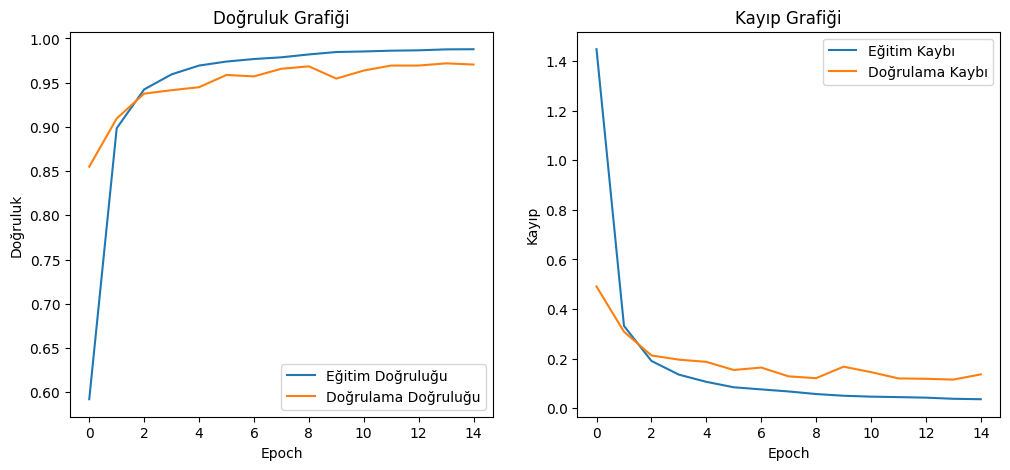

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_df['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Eğitim Kaybı')
plt.plot(history_df['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

Modelin eğitim süreci tamamlandıktan sonra, öğrenme performansını analiz etmek amacıyla doğruluk (accuracy) ve kayıp (loss) değerleri grafik haline getirildi. Bu görselleştirmeler, modelin sağlığını değerlendirmek ve olası ezberleme (overfitting) problemlerini tespit etmek için kritik öneme sahiptir.

Doğruluk Grafiği: Bu grafik, modelin her bir epoch'taki başarısını hem eğitim verileri (accuracy) hem de daha önce görmediği doğrulama verileri (val_accuracy) üzerinde göstermektedir. İki eğrinin birlikte artması, modelin öğrendiklerini genelleme yeteneğini gösterir.

Kayıp Grafiği: Bu grafik ise modelin hata oranını gösterir. Eğitim süresince her iki eğrinin de (loss ve val_loss) tutarlı bir şekilde azalması, başarılı bir öğrenme sürecine işaret eder.

Bu grafikler, modelin epoch'lar boyunca ne kadar kararlı öğrendiğini ve performansının bir noktadan sonra doygunluğa ulaşıp ulaşmadığını anlamamızı sağlar.

In [5]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)

print(f"Test Veri Seti Doğruluğu: {test_accuracy * 100:.2f}%")
print(f"Test Veri Seti Kaybı: {test_loss:.4f}")

Test Veri Seti Doğruluğu: 96.03%
Test Veri Seti Kaybı: 0.2192


Eğitim ve doğrulama süreçleri tamamlandıktan sonra, modelin genelleme performansını ölçmek amacıyla daha önce hiç görmediği test veri seti üzerinde nihai bir değerlendirme yapılmıştır.

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        60
           1       0.97      0.98      0.98       720
           2       0.99      0.97      0.98       750
           3       0.96      0.95      0.95       450
           4       0.98      0.97      0.97       660
           5       0.95      0.94      0.95       630
           6       0.99      0.87      0.93       150
           7       0.95      0.96      0.96       450
           8       0.90      1.00      0.95       450
           9       0.97      0.98      0.98       480
          10       0.99      0.99      0.99       660
          11       0.92      0.98      0.95       420
          12       0.94      0.98      0.96       690
          13       0.98      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       0.92      0.98      0.95       210
          16      

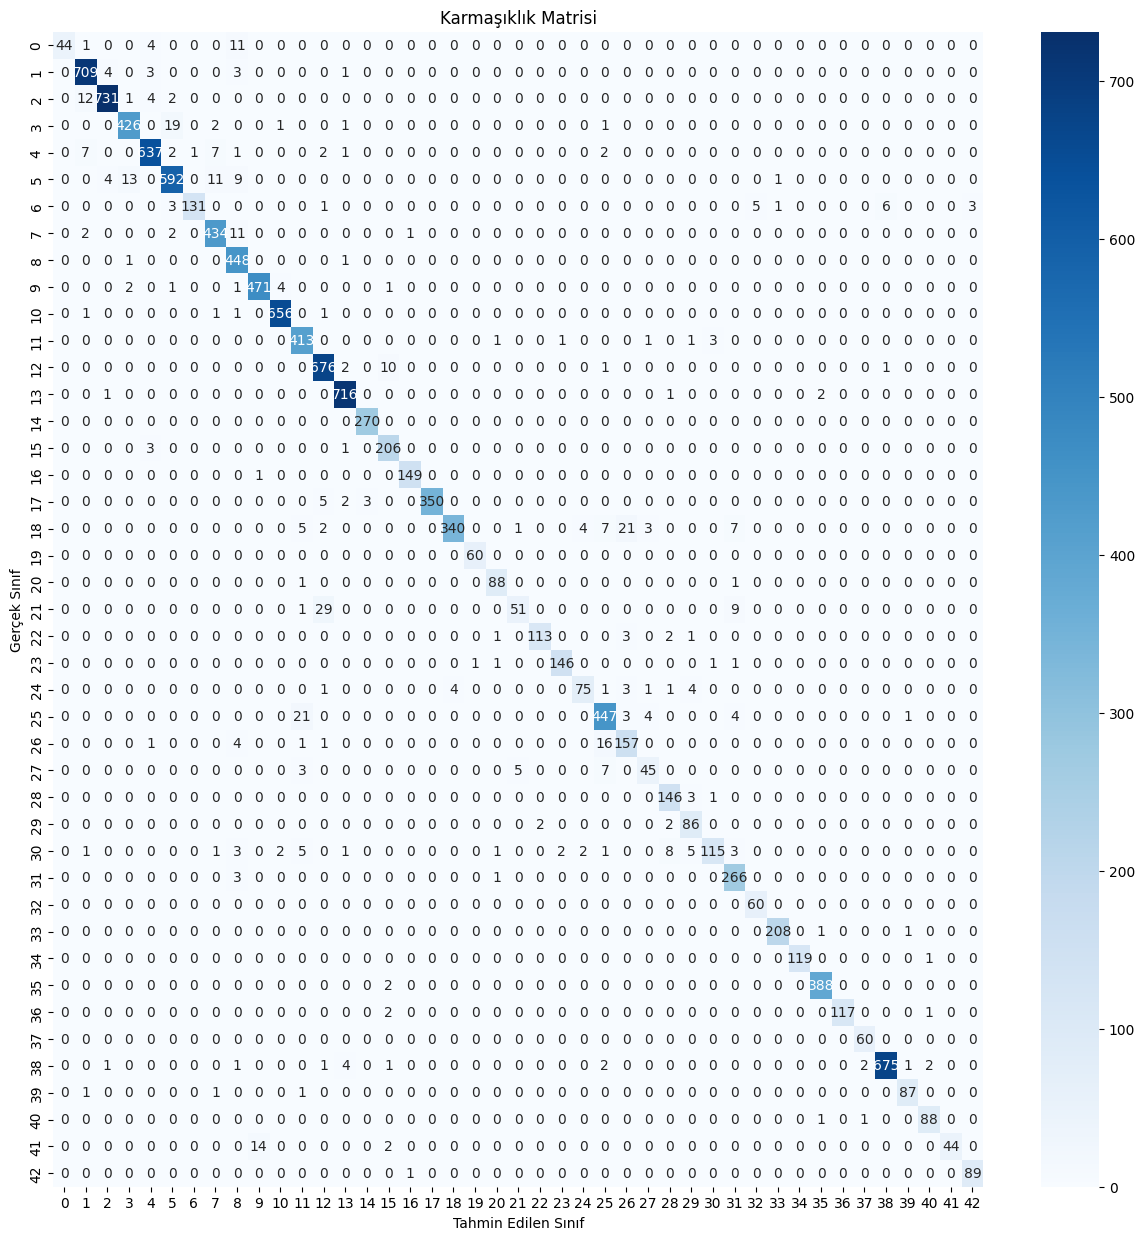

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probabilities = model.predict(X_test_normalized)

y_pred = np.argmax(y_pred_probabilities, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\nKarmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

Modelin genel test doğruluğunu hesapladıktan sonra, performansını her bir sınıf bazında daha derinlemesine incelemek için detaylı bir analiz yapılmıştır. Bu analiz, modelin güçlü ve zayıf yönlerini ortaya çıkarmak için Sınıflandırma Raporu ve Karmaşıklık Matrisi olmak üzere iki temel araç kullanılarak gerçekleştirilmiştir.

Sınıflandırma Raporu, her bir trafik işareti sınıfı için precision, recall ve f1-score gibi metrikleri sunarak modelin o sınıftaki başarısını sayısal olarak özetlemektedir.

Karmaşıklık Matrisi (Confusion Matrix) ise, modelin yaptığı hataları görsel olarak inceleme imkanı sunar. seaborn kütüphanesi ile bir ısı haritası olarak çizdirilen bu matris, modelin hangi trafik işaretlerini birbiriyle en çok karıştırdığını net bir şekilde göstermektedir. Matrisin köşegeni doğru tahminleri temsil ederken, köşegen dışındaki değerler modelin yaptığı sınıflandırma hatalarını belirtir.

Bulunan son konvolüsyon katmanı: conv2d_3


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_56']]
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


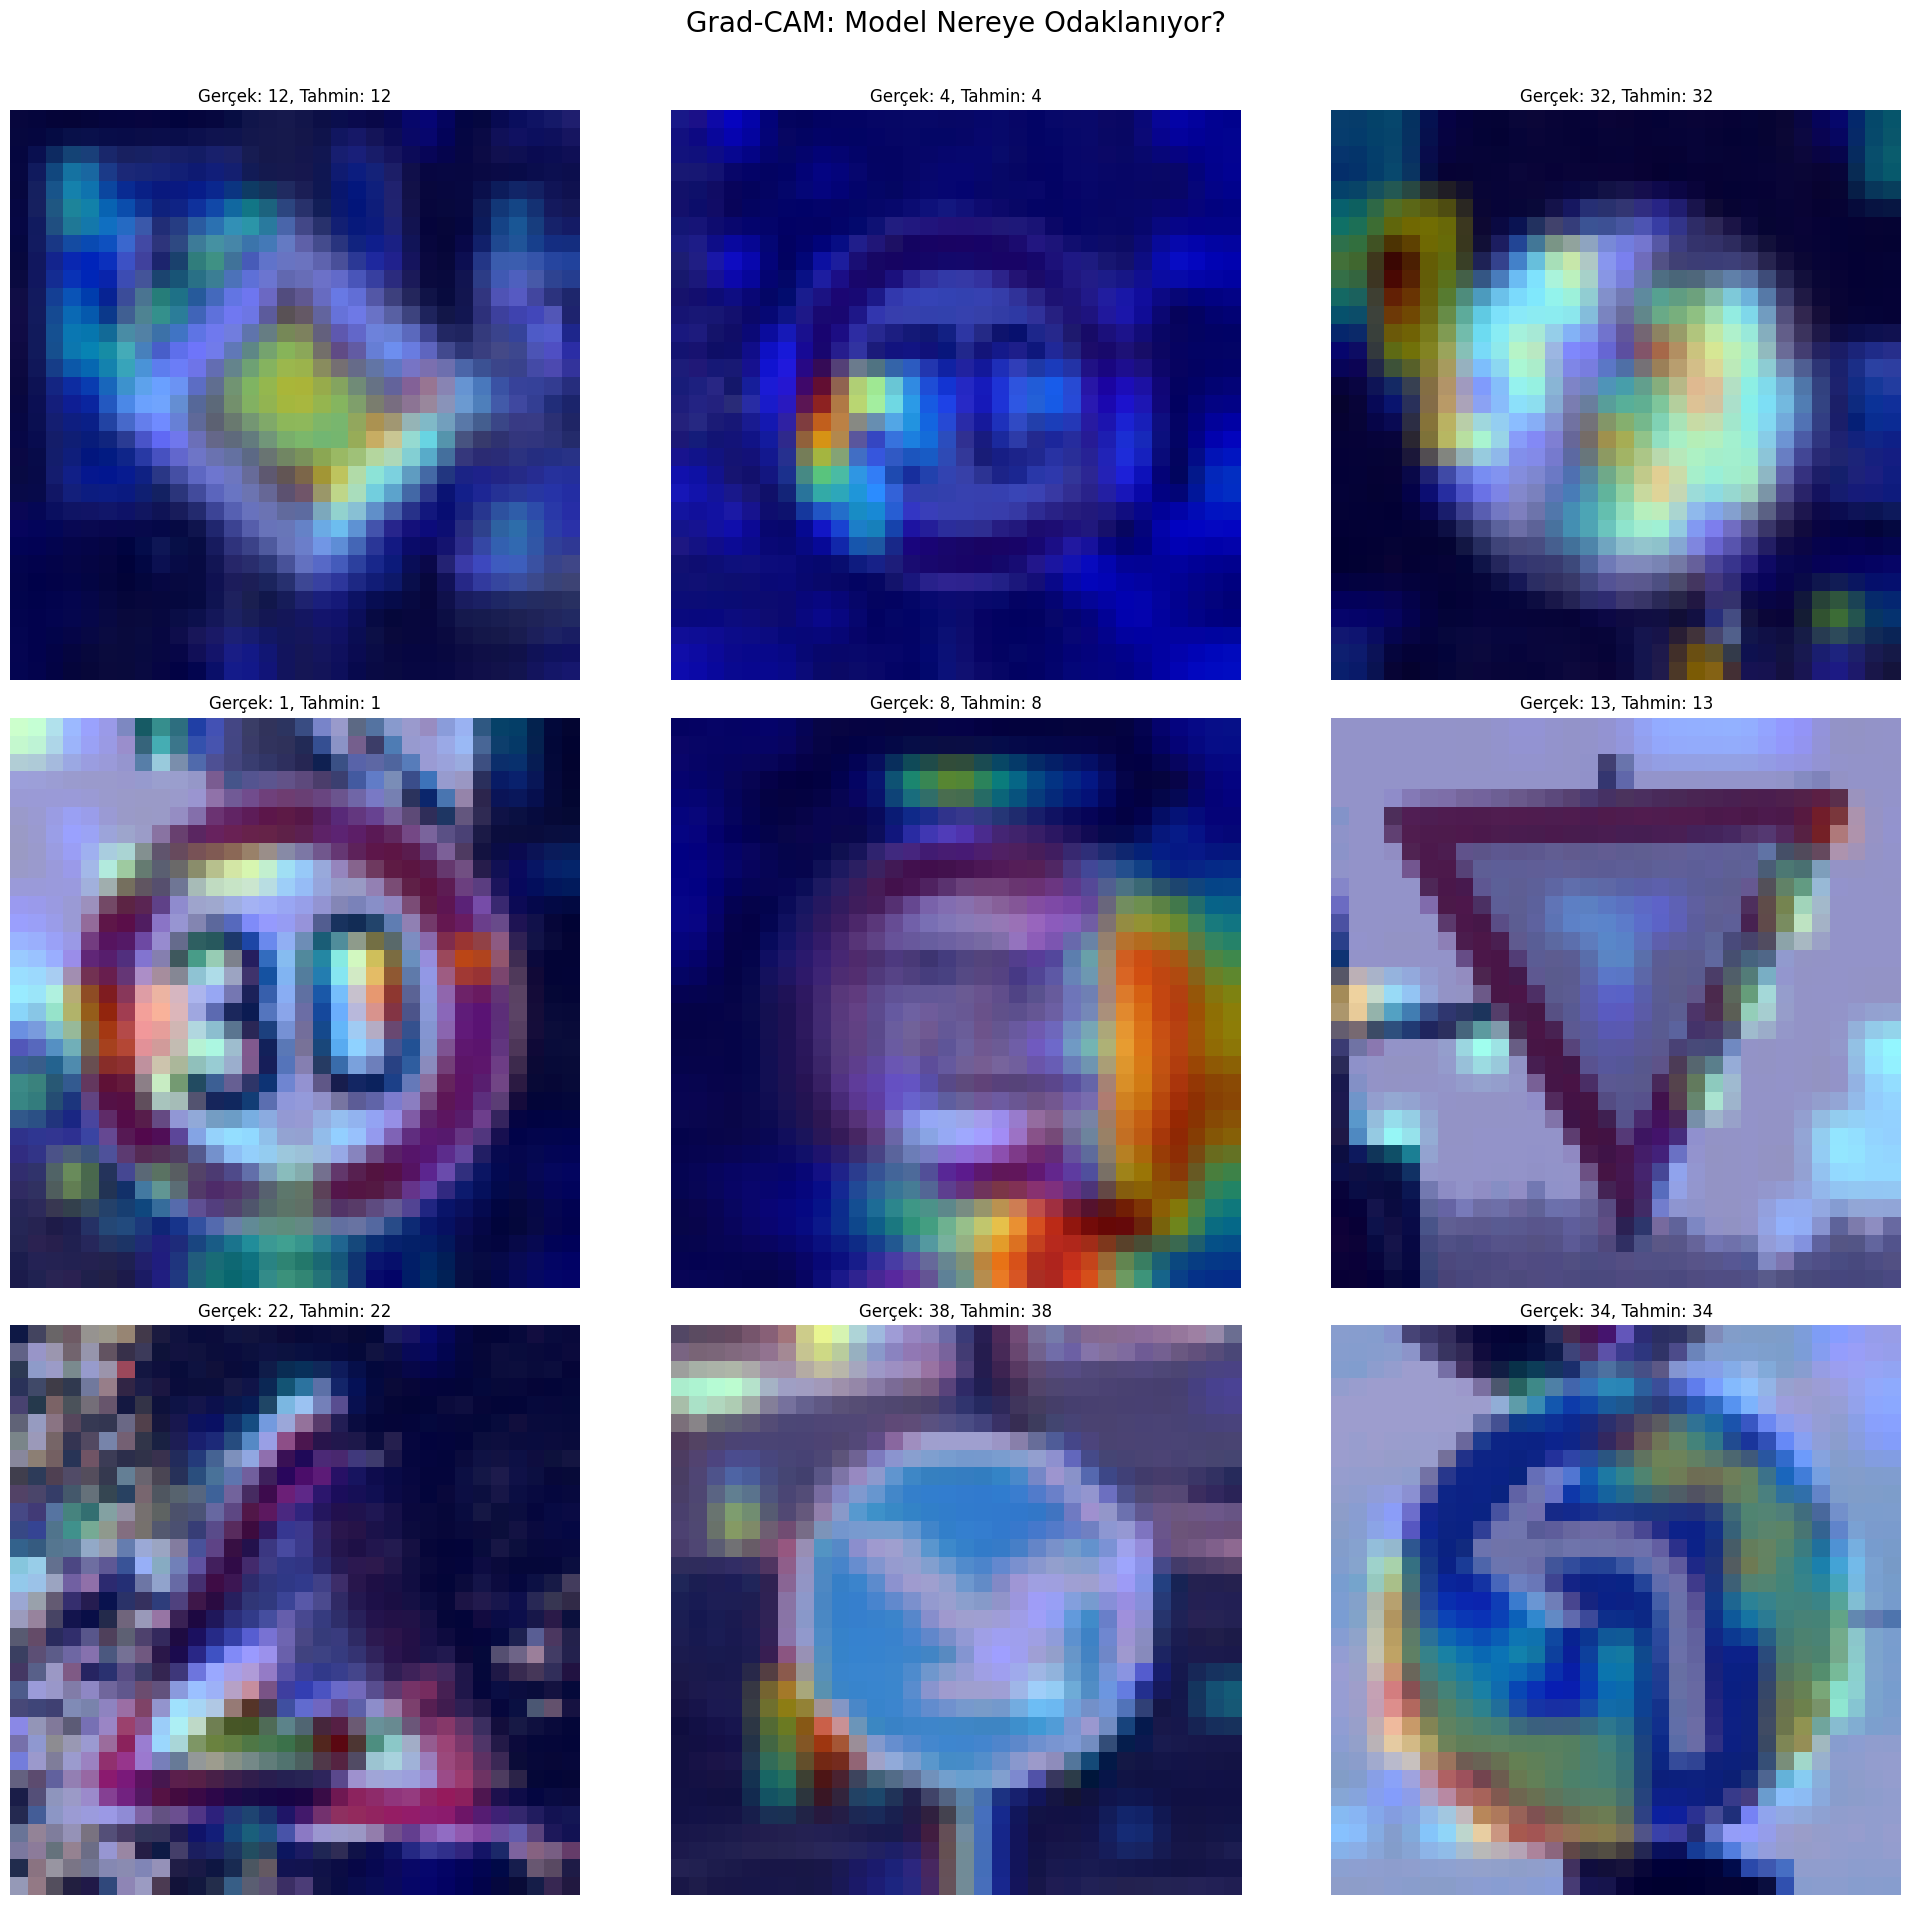

In [7]:
import tensorflow as tf
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

inputs = tf.keras.Input(shape=image_shape)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.25)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.25)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=512, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=n_classes, activation='softmax')(x)

functional_model = tf.keras.Model(inputs, outputs)

functional_model.set_weights(model.get_weights())


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img, heatmap, alpha=0.6):
    heatmap = np.uint8(255 * heatmap)
    jet = plt.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)
    return superimposed_img

last_conv_layer_name = ""
for layer in reversed(functional_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print(f"Bulunan son konvolüsyon katmanı: {last_conv_layer_name}")

plt.figure(figsize=(20, 20))
plt.suptitle("Grad-CAM: Model Nereye Odaklanıyor?", fontsize=20)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    idx = random.randint(0, len(X_test_normalized) - 1)
    image_to_visualize = X_test_normalized[idx]
    img_array = np.expand_dims(image_to_visualize, axis=0)
    
    prediction = functional_model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)
    
    heatmap = make_gradcam_heatmap(img_array, functional_model, last_conv_layer_name)
    superimposed_img = save_and_display_gradcam(X_test[idx], heatmap)
    
    plt.imshow(superimposed_img)
    plt.title(f"Gerçek: {y_test[idx]}, Tahmin: {predicted_class}")
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Sınıflandırma modellerinin sadece neyi tahmin ettiği değil, bu tahmini neden yaptığı da önemlidir. Modelin karar mekanizmasını anlamak ve şeffaflığını artırmak amacıyla, Grad-CAM (Gradient-weighted Class Activation Mapping) tekniği uygulanmıştır.

Bu yöntem, modelin bir tahminde bulunurken giriş görüntüsünün hangi bölgelerini daha önemli bulduğunu gösteren bir ısı haritası (heatmap) oluşturur. Teknik bir gereklilik olarak, önce mevcut modelin eğitilmiş ağırlıkları korunarak Keras Fonksiyonel API'si ile daha esnek bir model yapısı oluşturulmuştur.

Ardından, test setinden rastgele seçilen görüntüler için Grad-CAM ısı haritaları üretilmiş ve orijinal görüntüler üzerine bindirilmiştir. Ortaya çıkan görsellerde, sıcak renkler (kırmızı) modelin karar verirken en çok odaklandığı pikselleri, soğuk renkler (mavi) ise daha az dikkate aldığı bölgeleri temsil etmektedir. Bu analiz, modelimizin doğru tahminler yaparken gerçekten de trafik işaretlerinin kendilerine odaklandığını ve alakasız arka plan detaylarını göz ardı ettiğini doğrulamamıza yardımcı olur.

In [8]:

!pip install -q -U keras-tuner

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=image_shape
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_units', min_value=256, max_value=1024, step=256),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(n_classes, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy', 
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='traffic_signs'
)

print("Hiperparametre optimizasyonu başlıyor...")
tuner.search(
    X_train_normalized,
    y_train,
    epochs=5,
    validation_data=(X_valid_normalized, y_valid)
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Arama tamamlandı. En iyi hiperparametreler:
- 1. Conv Katmanı Filtre Sayısı: {best_hps.get('conv_1_filters')}
- 1. Dropout Oranı: {best_hps.get('dropout_1'):.2f}
- 2. Conv Katmanı Filtre Sayısı: {best_hps.get('conv_2_filters')}
- 2. Dropout Oranı: {best_hps.get('dropout_2'):.2f}
- Dense Katmanı Nöron Sayısı: {best_hps.get('dense_units')}
- 3. Dropout Oranı: {best_hps.get('dropout_3'):.2f}
- Öğrenme Oranı: {best_hps.get('learning_rate')}
""")

Trial 10 Complete [00h 02m 56s]
val_accuracy: 0.054421767592430115

Best val_accuracy So Far: 0.9639455676078796
Total elapsed time: 00h 46m 14s

Arama tamamlandı. En iyi hiperparametreler:
- 1. Conv Katmanı Filtre Sayısı: 96
- 1. Dropout Oranı: 0.30
- 2. Conv Katmanı Filtre Sayısı: 128
- 2. Dropout Oranı: 0.30
- Dense Katmanı Nöron Sayısı: 256
- 3. Dropout Oranı: 0.30
- Öğrenme Oranı: 0.001



Model performansını en üst düzeye çıkarmak amacıyla, en iyi model mimarisini ve eğitim ayarlarını bulmak için hiperparametre optimizasyonu süreci uygulanmıştır. Bu süreç, Keras Tuner kütüphanesi kullanılarak otomatikleştirilmiştir.

Optimizasyon için bir arama uzayı tanımlanmıştır. Bu uzayda, konvolüsyon katmanlarındaki filtre sayısı, dropout oranları, dense katmanındaki nöron sayısı ve optimizer'ın öğrenme oranı gibi kritik hiperparametrelerin farklı değerleri test edilmiştir. Arama stratejisi olarak RandomSearch seçilmiş ve en yüksek doğrulama doğruluğunu (val_accuracy) hedefleyen 10 farklı model kombinasyonu denenmiştir.

Arama süreci tamamlandıktan sonra, en iyi performansı gösteren modelin hiperparametreleri tespit edilerek projenin nihai, optimize edilmiş modelini oluşturmak için bir temel sağlanmıştır.

In [9]:

best_model = tuner.get_best_models(num_models=1)[0]


print("En iyi modelin mimarisi:")
best_model.summary()


print("\nEn iyi modelin tam eğitimi başlatılıyor...")
history_best = best_model.fit(
    X_train_normalized,
    y_train,
    epochs=25,
    validation_data=(X_valid_normalized, y_valid),
    verbose=1
)
print("\nEn iyi modelin eğitimi tamamlandı!")

En iyi modelin mimarisi:


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,304,363 (4.98 MB)

 Trainable params: 1,304,363 (4.98 MB)

 Non-trainable params: 0 (0.00 B)


En iyi modelin tam eğitimi başlatılıyor...
Epoch 1/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 86s 77ms/step - accuracy: 0.9780 - loss: 0.0675 - val_accuracy: 0.9635 - val_loss: 0.1444
Epoch 2/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9815 - loss: 0.0603 - val_accuracy: 0.9580 - val_loss: 0.1622
Epoch 3/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9580 - val_loss: 0.1579
Epoch 4/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9832 - loss: 0.0485 - val_accuracy: 0.9601 - val_loss: 0.1669
Epoch 5/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.9828 - loss: 0.0526 - val_accuracy: 0.9721 - val_loss: 0.1282
Epoch 6/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.9867 - loss: 0.0405 - val_accuracy: 0.9651 - val_loss: 0.1563
Epoch 7/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9891 - loss: 0.0385 - val_accuracy: 0.9619 - val_loss: 0.2314
Epoch 8/25
1088/1088 ━━━━━━━━━━━

Hiperparametre optimizasyonu sürecinde en iyi performansı gösteren model yapılandırması belirlendikten sonra, bu yapılandırma kullanılarak projenin nihai modeli oluşturulmuştur.

Keras Tuner'dan alınan en iyi model, tam potansiyeline ulaşabilmesi için daha kapsamlı bir eğitim sürecine tabi tutulmuştur. Arama aşamasındaki kısa süreli (5 epoch) eğitimin aksine, bu nihai model, tüm eğitim verisi üzerinde 25 epoch boyunca eğitilmiştir. Bu daha uzun eğitim süresi, modelin veri setindeki desenleri daha derinlemesine öğrenmesini ve performansını en üst seviyeye çıkarmasını amaçlamaktadır.

Eğitim süreci sonunda elde edilen bu model, projenin en iyi ve optimize edilmiş versiyonunu temsil etmektedir ve nihai değerlendirmeler bu model üzerinden yapılacaktır.